# 8- METRICS

The rapid expansion of NILM and the development of different algorithms have made it essential to provide performance evaluation through performance metrics. The evaluation metrics compare the disaggregation results (predictions) of the trained models with the validation set data (actual measurements of each process). NILMTK includes the calculation of evaluation metrics using MeterGroup for validating results through the validation set.

Let's now analyze different metrics in our dataset such as FEAC, F1, EAE, MNEAP and RMSE which we summarize in the following table:

![metricas](metricas.jpg)

First, let's load the libraries and make other adjustments:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

from nilmtk import TimeFrame, MeterGroup, HDFDataStore, DataSet
from nilmtk.metrics import fraction_energy_assigned_correctly, mean_normalized_error_power
from nilmtk.metrics import rms_error_power, f1_score, error_in_assigned_energy

data_dir='./data/'

### Individual Model Metrics

In [2]:
#Librerías
from nilmtk.metrics import f1_score
from nilmtk.metrics import error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power
from nilmtk.metrics import rms_error_power
from nilmtk.metrics import fraction_energy_assigned_correctly

In [4]:

labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})


 

#Set para validación
valid = DataSet('dsual.h5')
valid.set_window(start="2023-06-09 12:55:00", end="2023-06-09 13:36:00")
valid_elec = valid.buildings[1].elec

print('Medidor de cabecera para desagregación:')
valid_Main = valid_elec.mains()
print(valid_Main)

print('\nDispositivos para validación de entrenamiento:')
valid_Devices = valid_elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
print(valid_Devices)




index = list(labels['Meters'][1:11])
met = []
e = []

#Datos de Dispositivos: predicción
#dataset=DataSet(data_dir+'NILM/Results/FHMM_90s_first_pred.h5')
#Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.316	0.375	0.000	0.000	0.000	0.632	0.000	0.375	0.133 media=0.2231
#EAE	0.404	0.096	0.014	0.021	0.048	0.077	0.149	0.011	0.002	0.001
#MNEAP	0.990	2.417	0.802	0.858	2.349	2.354	0.911	0.904	1.090	1.258
#RMSE	1035.168	622.580	30.504	51.696	383.924	607.297	561.321	25.163	44.028	39.903

#dataset=DataSet(data_dir+'NILM/Results/CO_90s_mean_pred.h5')
#	Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.444	0.357	0.800	0.467	0.235	0.000	0.308	0.452	0.240	0.261 media=0.3524.
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	1.037	1.288	0.466	0.869	2.027	1.000	1.580	0.727	1.612	1.362
#RMSE	945.031	286.946	21.542	46.429	301.793	621.117	711.989	22.134	49.814	40.085



dataset=DataSet(data_dir+'NILM/Results/CO_1s_mean_pred.h5')  #simple the best!!!!

#Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.525	0.406	0.796	0.498	0.233	0.213	0.463	0.655	0.313	0.338  media=0.494
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.857	1.622	0.597	1.198	2.429	2.454	1.175	0.679	5.926	4.589
#RMSE	909.292	561.436	24.373	56.746	323.378	859.279	651.137	22.964	299.831	197.582


#dataset=DataSet(data_dir+'NILM/Results/CO_1s_first_pred.h5')
#	Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.515	0.448	0.721	0.517	0.259	0.263	0.483	0.661	0.400	0.327 media :0.4294
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.933	1.593	0.666	1.043	3.081	2.221	1.187	0.686	5.699	4.824
#RMSE	946.789	554.820	26.939	54.247	412.764	797.485	640.808	23.040	307.220	213.903

#dataset=DataSet(data_dir+'NILM/Results/CO_1s_median_pred.h5')
#	Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.495	0.463	0.810	0.482	0.279	0.144	0.397	0.585	0.453	0.447  media=0.4155
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.949	1.397	0.394	1.060	2.969	2.682	1.236	0.885	5.417	3.392
#RMSE	972.558	515.776	20.917	54.378	404.618	912.159	666.784	25.492	281.397	158.472




#dataset=DataSet(data_dir+'NILM/Results/CO_15s_mean_pred.h5')
#	Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.603	0.431	0.776	0.545	0.248	0.18	0.444	0.649	0.410	0.398 media =0.4084
#EAE	0.000	0.000	0.000	0.000	0.000	0.00	0.000	0.000	0.000	0.000
#MNEAP	0.858	1.551	0.591	1.105	2.851	2.36	1.199	0.713	2.215	2.047
#RMSE	883.066	486.788	24.530	54.988	362.516	843.89	634.270	21.836	73.202	65.037




#dataset=DataSet(data_dir+'NILM/Results/CO_30s_mean_pred.h5')
#	Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.714	0.425	0.678	0.380	0.145	0.000	0.475	0.488	0.411	0.412 media=0.4128.
#EAE	1.839	0.425	0.028	0.087	0.816	0.119	1.016	0.035	0.078	0.068
#MNEAP	0.685	1.177	0.636	1.197	3.613	1.000	1.216	0.829	1.324	1.160
#RMSE	715.713	287.758	26.069	58.143	404.270	639.580	637.537	24.392	44.899	36.518



#dataset=DataSet(data_dir+'NILM/Results/FHMM_30s_mean_pred.h5')
#Electric furnace	Microwave	Television	Incandescent Lamp	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.471	0.203	0.750	0.407	0.341	0.093	0.618	0.386	0.219	0.264: media 0.3552
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.819	1.586	0.488	0.817	1.552	2.278	0.912	0.879	1.560	1.151
#RMSE	935.060	360.997	22.399	49.362	238.272	623.041	575.484	24.875	52.265	39.083


predictions=dataset.buildings[1].elec.submeters()      

#Metricas
f1 = {};
eae = {};
feac = {};
mneap = {};
rmse = {};



f1['F1'] = f1_score(predictions, valid_Devices)

EAE = error_in_assigned_energy(predictions, valid_Devices)

for x in range(len(EAE)): e.append(EAE.iloc[x][0])
eae['EAE'] = e
#da error esta medida AttributeError: 'tuple' object has no attribute 'instance'
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                      pd.DataFrame(f1),
                      pd.DataFrame(eae, index=valid_Devices.instance()),
                      pd.DataFrame(mneap),
                      pd.DataFrame(rmse)],
                     axis=1).set_index(pd.Index(index)))

dataset.store.close()       
print('\n\nDone!')
metrics=met[0].transpose().round(3)
metrics

Medidor de cabecera para desagregación:
ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Dispositivos para validación de entrenamiento:
MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance

,Electric furnace,Microwave,Television,Incandescent Lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
F1,0.576,0.518,0.767,0.479,0.261,0.189,0.431,0.651,0.434,0.423
EAE,0.767,0.399,0.027,0.082,0.594,0.895,0.681,0.054,0.422,0.351
MNEAP,0.849,1.645,0.595,1.095,2.617,2.112,1.196,0.713,4.893,4.400
RMSE,880.820,570.959,24.598,54.838,333.217,806.931,657.188,23.501,269.037,201.280


Loading prediction and GT data into memory

In [12]:
gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=60, resample_kwargs={'how':'first'})


labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})


Meters={}
for x in range(len(labels)): Meters[valid_elec[x+1]]=labels['Meters'][x]
    

    
    
#resultados de predicción modelo CO 90s
#CO_90s_first=DataSet(data_dir+'NILM/Results/CO_90s_first_pred.h5')
#elec_CO_90s_first=CO_90s_first.buildings[1].elec
#resultados de predicción modelo CO 1s
CO_1s_first=DataSet(data_dir+'NILM/Results/CO_1s_first_pred.h5')
elec_CO_1s_first=CO_1s_first.buildings[1].elec


#resultados de predicción modelo FHMM 90s
FHMM_90s_first=DataSet(data_dir+'NILM/Results/FHMM_1s_first_pred.h5')
elec_FHMM_90s_first= FHMM_90s_first.buildings[1].elec    
    
    

gt.columns=list(Meters.values())
#pred_CO=elec_CO_90s_first.dataframe_of_meters(ac_type='active')
pred_CO=elec_CO_1s_first.dataframe_of_meters(ac_type='active')
pred_CO.columns=[list(Meters.values())[0]]+list(Meters.values())[1:12]

pred_FHMM=elec_FHMM_90s_first.dataframe_of_meters(ac_type='active')
pred_FHMM.columns=[list(Meters.values())[0]]+list(Meters.values())[1:12]

### Detailed Analysis of Each Metric Calculation

FEAC Metric (may encounter issues with AttributeError: 'tuple' object has no attribute 'instance')

In [13]:
#Carga de datos de predicciones y GT en memoria
gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=1, resample_kwargs={'how':'mean'})
gt.columns=list(Meters.values())

10/10 ElecMeter(instance=11, building=1, dataset='CO', appliances=[Appliance(type='freezer', instance=1)])instance=1)]))])

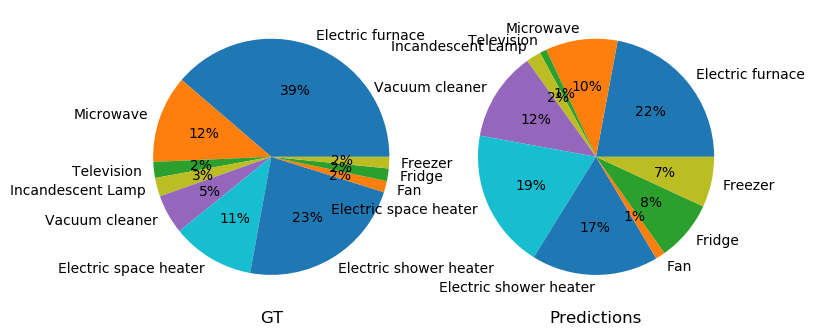

In [14]:
predictions_Devices=elec_CO_1s_first.submeters()

frac_1 = valid_Devices.fraction_per_meter()
frac_2 = predictions_Devices.fraction_per_meter()
fig, (ax1, ax2) = plt.subplots(1, 2 ,gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

frac_1.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',labels=list(Meters.values())[1:12], figsize=(8,8), ax=ax1,   colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan'])
frac_2.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',  labels=list(Meters.values())[1:12], figsize=(8,8), ax=ax2,  colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']) 

ax1.set(ylabel="")
ax1.set(xlabel="GT")
ax2.set(ylabel="")
ax2.set(xlabel="Predictions")
plt.savefig('./data/images/5.4_FEAC_CO_1s.svg', bbox_inches='tight', transparent=True)
pass

## F1 Metric

This metric measures the accuracy or assertiveness of the trained model by calculating the harmonic mean using Precision and Recall metrics. These metrics are calculated internally by NILMTK using the confusion matrix, as shown in the equation in the following figure.

![metricas](metricas.jpg)

Precision is understood as the fraction of time slices where a process was correctly predicted to be active, but was actually turned off. On the other hand, Recall refers to the fraction of time slices where the device was correctly predicted to be on and was actually on.

In [15]:
pd.DataFrame(metrics.loc['F1']).transpose()*100

,Electric furnace,Microwave,Television,Incandescent Lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
F1,57.6,51.8,76.7,47.9,26.1,18.9,43.1,65.1,43.4,42.3


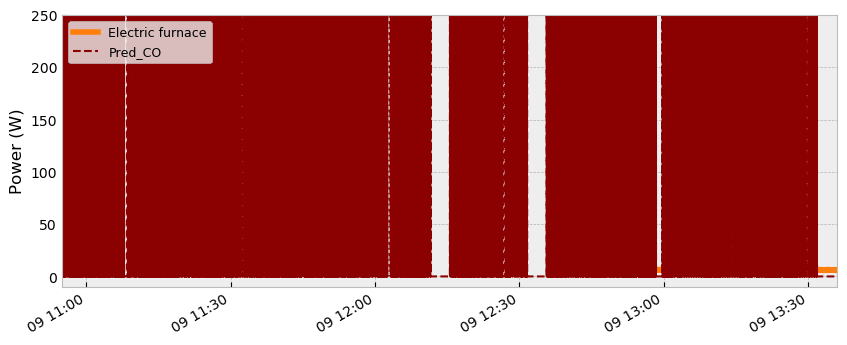

In [16]:
rcParams['figure.figsize'] = (10, 4)



#valid.set_window(start="2023-06-09 12:55:00", end="2023-06-09 13:36:00")
t0='2023-06-09 12:55:00'#tiempo inicial  validacion
t1='2023-06-09 13:36:00' #tiempo final validacion




fig, ax1 = plt.subplots();
ax1=gt['Electric furnace'].plot(lw=4, c='tab:orange')
pred_CO['Electric furnace'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric furnace','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim()

#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

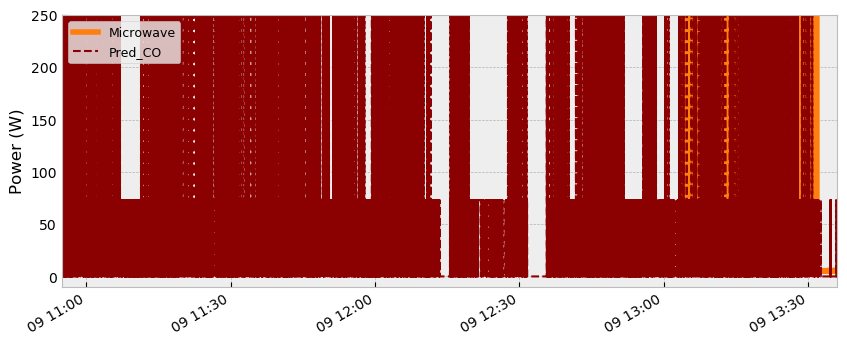

In [17]:
rcParams['figure.figsize'] = (10, 4)


fig, ax1 = plt.subplots();
ax1=gt['Microwave'].plot(lw=4, c='tab:orange')
pred_CO['Microwave'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Microwave','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)

ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

       

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

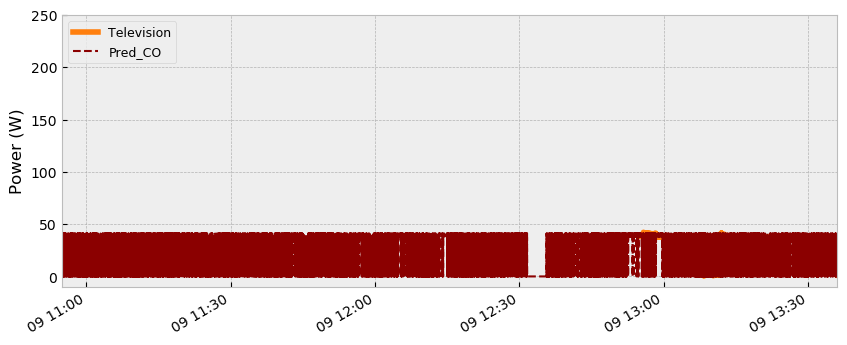

In [18]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Television'].plot(lw=4, c='tab:orange')
pred_CO['Television'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Television','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

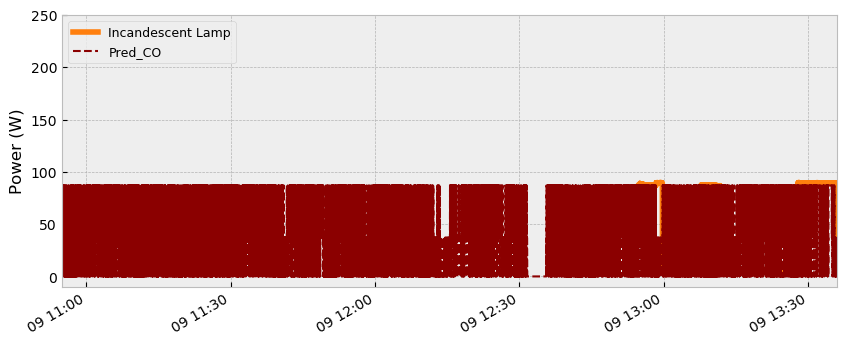

In [19]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Incandescent Lamp'].plot(lw=4, c='tab:orange')
pred_CO['Incandescent Lamp'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Incandescent Lamp','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)

ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

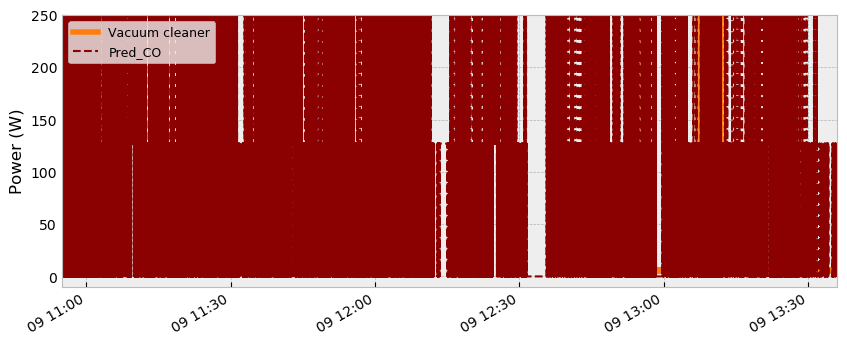

In [20]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Vacuum cleaner'].plot(lw=4, c='tab:orange')
pred_CO['Vacuum cleaner'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Vacuum cleaner','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

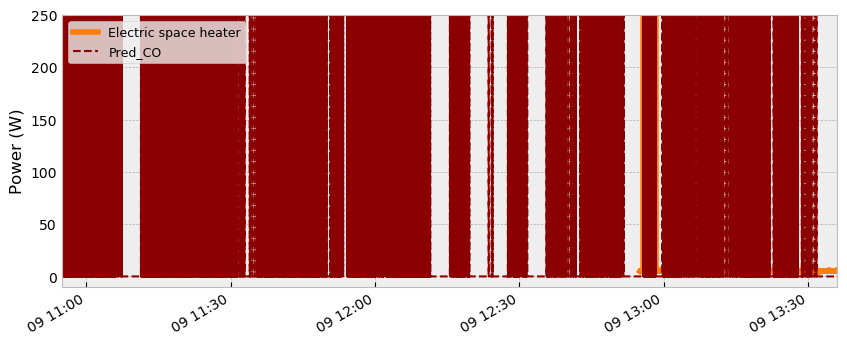

In [21]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Electric space heater'].plot(lw=4, c='tab:orange')
pred_CO['Electric space heater'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric space heater','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)

ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()
#ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')




plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

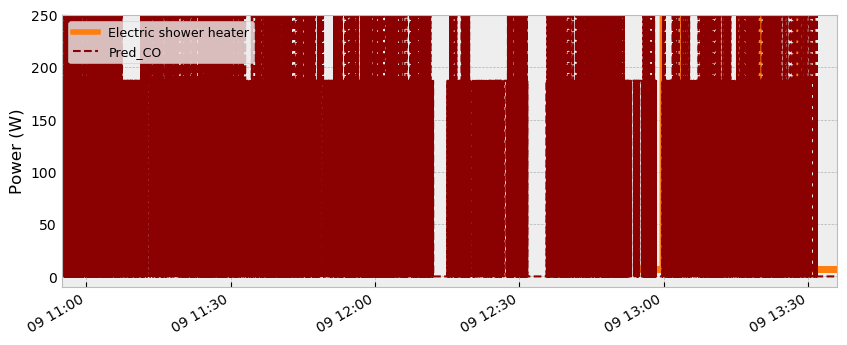

In [22]:
rcParams['figure.figsize'] = (10, 4)


fig, ax1 = plt.subplots();
ax1=gt['Electric shower heater'].plot(lw=4, c='tab:orange')
pred_CO['Electric shower heater'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric shower heater','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

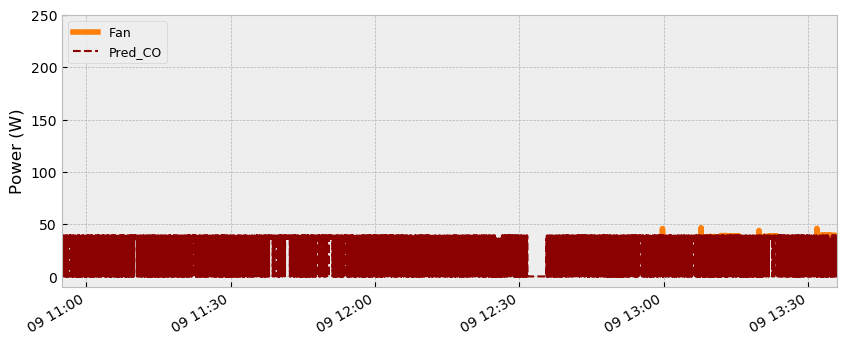

In [23]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Fan'].plot(lw=4, c='tab:orange')
pred_CO['Fan'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Fan','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)

ax1.set_xlim()
#ax1.set_xlim(t0,t1)

ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

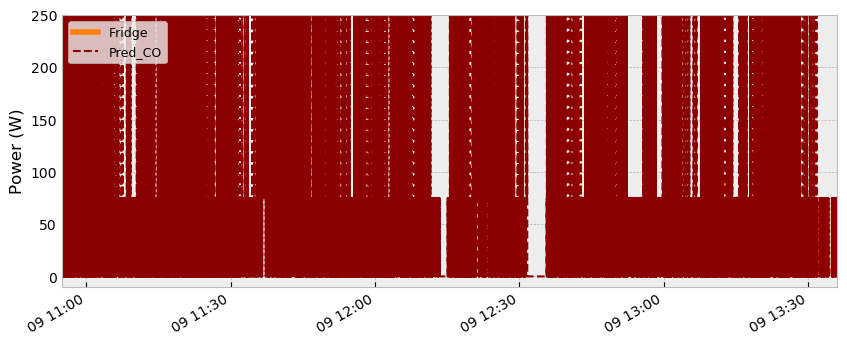

In [24]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Fridge'].plot(lw=4, c='tab:orange')
pred_CO['Fridge'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Fridge','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)

#ax1.set_xlim(t0,t1)
ax1.set_xlim()
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

         

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

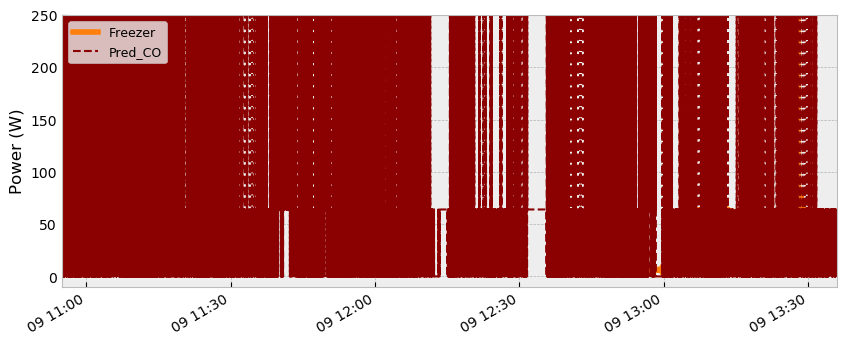

In [25]:
rcParams['figure.figsize'] = (10, 4)
fig, ax1 = plt.subplots();
ax1=gt['Freezer'].plot(lw=4, c='tab:orange')
pred_CO['Freezer'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Freezer','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim()
#ax1.set_xlim(t0,t1)
ax1.minorticks_off()
ax1.set_ylabel('Power (W)')




plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

## EAE Metric

The equation in the figure represents the difference between the total assigned energy yˆt(n) and the total consumed energy yt(n) by process n in kWh


![metricas](metricas.jpg)

In [26]:
round(pd.DataFrame(metrics.loc['EAE']).transpose(),2)

,Electric furnace,Microwave,Television,Incandescent Lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
EAE,0.77,0.4,0.03,0.08,0.59,0.9,0.68,0.05,0.42,0.35


In [27]:
predictions_Devices=elec_CO_1s_first.submeters()
e1=predictions_Devices[10].total_energy()[0]
e2=valid_Devices[10].total_energy()[0]
eae=round(abs(e1-e2),2)

pd.DataFrame([e1,e2,eae], columns=['kWh'], index=['Energy_pred','Energy_GT','EAE'])

,kWh
Energy_pred,0.440131
Energy_GT,0.018187
EAE,0.420000


## MNEAP Metric

This indicator, represented by the equation in the image, consists of the difference between the assigned power yˆt(n) and the actual power yt(n) of each process, for each time interval t. After summing all the power differences, the result is normalized by the total energy consumption of the process.


![metricas](metricas.jpg)

In [28]:
round(pd.DataFrame(metrics.loc['MNEAP']).transpose(),2)

,Electric furnace,Microwave,Television,Incandescent Lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
MNEAP,0.85,1.64,0.6,1.1,2.62,2.11,1.2,0.71,4.89,4.4


## RMSE Metric

This metric shown in the equation is widely used in comparing various datasets. It consists of the root mean square error of the difference between the assigned power yˆt(n) and the actual power yt(n) of the appliance processes, for each time interval t.

![metricas](metricas.jpg)

In [29]:
round(pd.DataFrame(metrics.loc['RMSE']).transpose(),1)

,Electric furnace,Microwave,Television,Incandescent Lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
RMSE,880.8,571.0,24.6,54.8,333.2,806.9,657.2,23.5,269.0,201.3


## Results for all models

In [32]:
from nilmtk.metrics import fraction_energy_assigned_correctly, f1_score, error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power, rms_error_power 



periods = {'1s':1}#, '90s':90, '5min':60*5, '10min':60*10}


dir_predictions = data_dir +'NILM/Results/'
m = {}
classifiers = ['CO', 'FHMM']
methods = ['first', 'mean', 'median']
index = list(labels['Meters'][1:12])

for p_name, sp in periods.items():
    met = []
    for method in methods:
        for clf_name in classifiers:
            print('\nCalculando Metricas: '+ clf_name + '_' + p_name + '_' + method)  
           
            #Datos de Dispositivos: predicción
            input_dir = dir_predictions + clf_name + '_' + p_name + '_' + method +'_pred.h5'
            dataset = DataSet(input_dir)
            predictions=dataset.buildings[1].elec.submeters()       
            
            #Metricas
            f1 = {};
            eae = {};
            feac = {};
            mneap = {};
            rmse = {};
            e=[];  
            
            
            F1 = f1_score(predictions, valid_Devices)
            f1['F1'] = F1*100
            EAE = error_in_assigned_energy(predictions, valid_Devices)
            
            for x in range(len(EAE)): e.append(EAE.iloc[x][0])
            eae['EAE'] = e
            #da error para FEAC
            #feac['FEAC'] = 100*np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
            mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
            rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
            met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                                  pd.DataFrame(f1),
                                  pd.DataFrame(eae, index=valid_Devices.instance()),
                                  pd.DataFrame(mneap),
                                  pd.DataFrame(rmse)],
                                 axis=1).set_index(pd.Index(index)))
            dataset.store.close()        
    m[p_name] = met

##Guardamos resultados
f = open(data_dir +'NILM/metrics.txt',"w")
f.write( str(m) )
f.close()
print('\n\nDone!')




Calculando Metricas: CO_1s_first

Calculando Metricas: FHMM_1s_first

Calculando Metricas: CO_1s_mean

Calculando Metricas: FHMM_1s_mean

Calculando Metricas: CO_1s_median

Calculando Metricas: FHMM_1s_median


Done!


## Other Metrics: Average Metrics

In [39]:

m_mean = {}



cols=['F1','EAE','MNEAP','RMSE']
labels=['CO-first', 'CO-mean', 'CO-median', 'FHMM-first', 'FHMM-mean' ,'FHMM-median']
per=['1s']

for c in cols:
    m_mean[c] = pd.DataFrame([#CO FIRST
                             [m['1s'][0][c].mean()],
                            #CO MEAN
                             [m['1s'][2][c].mean()],
                                 #CO MEDIAN
                             [m['1s'][4][c].mean()],
                                [m['1s'][1][c].mean()],
                               #FHMM MEAN            
                             [m['1s'][3][c].mean()],
                               #FHMM MEDIAN
                             [m['1s'][5][c].mean()],
                             ],columns=per, index=labels).transpose()
m_mean



{'F1':      CO-first    CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 1s  44.661762  47.293605  43.832422   43.757142  44.777908    36.796671,
 'EAE':     CO-first  CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 1s       0.0      0.0        0.0         0.0        0.0          0.0,
 'MNEAP':     CO-first   CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 1s   2.14815  2.011313   2.270252    1.412705   1.204297     1.256995,
 'RMSE':       CO-first     CO-mean   CO-median  FHMM-first   FHMM-mean  FHMM-median
 1s  392.787259  382.236975  408.819332  354.486926  338.427347   381.894475}

## Maximum Values


In [40]:
cols=['F1','EAE','MNEAP','RMSE']

maxs=pd.concat([m_mean['F1'].transpose().max(),
                m_mean['EAE'].transpose().min(),
                m_mean['MNEAP'].transpose().min(),
                m_mean['RMSE'].transpose().min()], axis=1)
maxs.columns=cols
maxs = maxs.transpose()
round(maxs,2)

,1s
F1,47.29
EAE,0.00
MNEAP,1.20
RMSE,338.43


## Index Correspondence

In [41]:
cols=['F1','EAE','MNEAP','RMSE']

maxs_i=pd.concat([m_mean['F1'].transpose().idxmax(),
                 m_mean['EAE'].transpose().idxmin(),
                 m_mean['MNEAP'].transpose().idxmin(),
                 m_mean['RMSE'].transpose().idxmin()], axis=1)
maxs_i.columns=cols
maxs_i = maxs_i.transpose()
maxs_i

,1s
F1,CO-mean
EAE,CO-first
MNEAP,FHMM-mean
RMSE,FHMM-mean


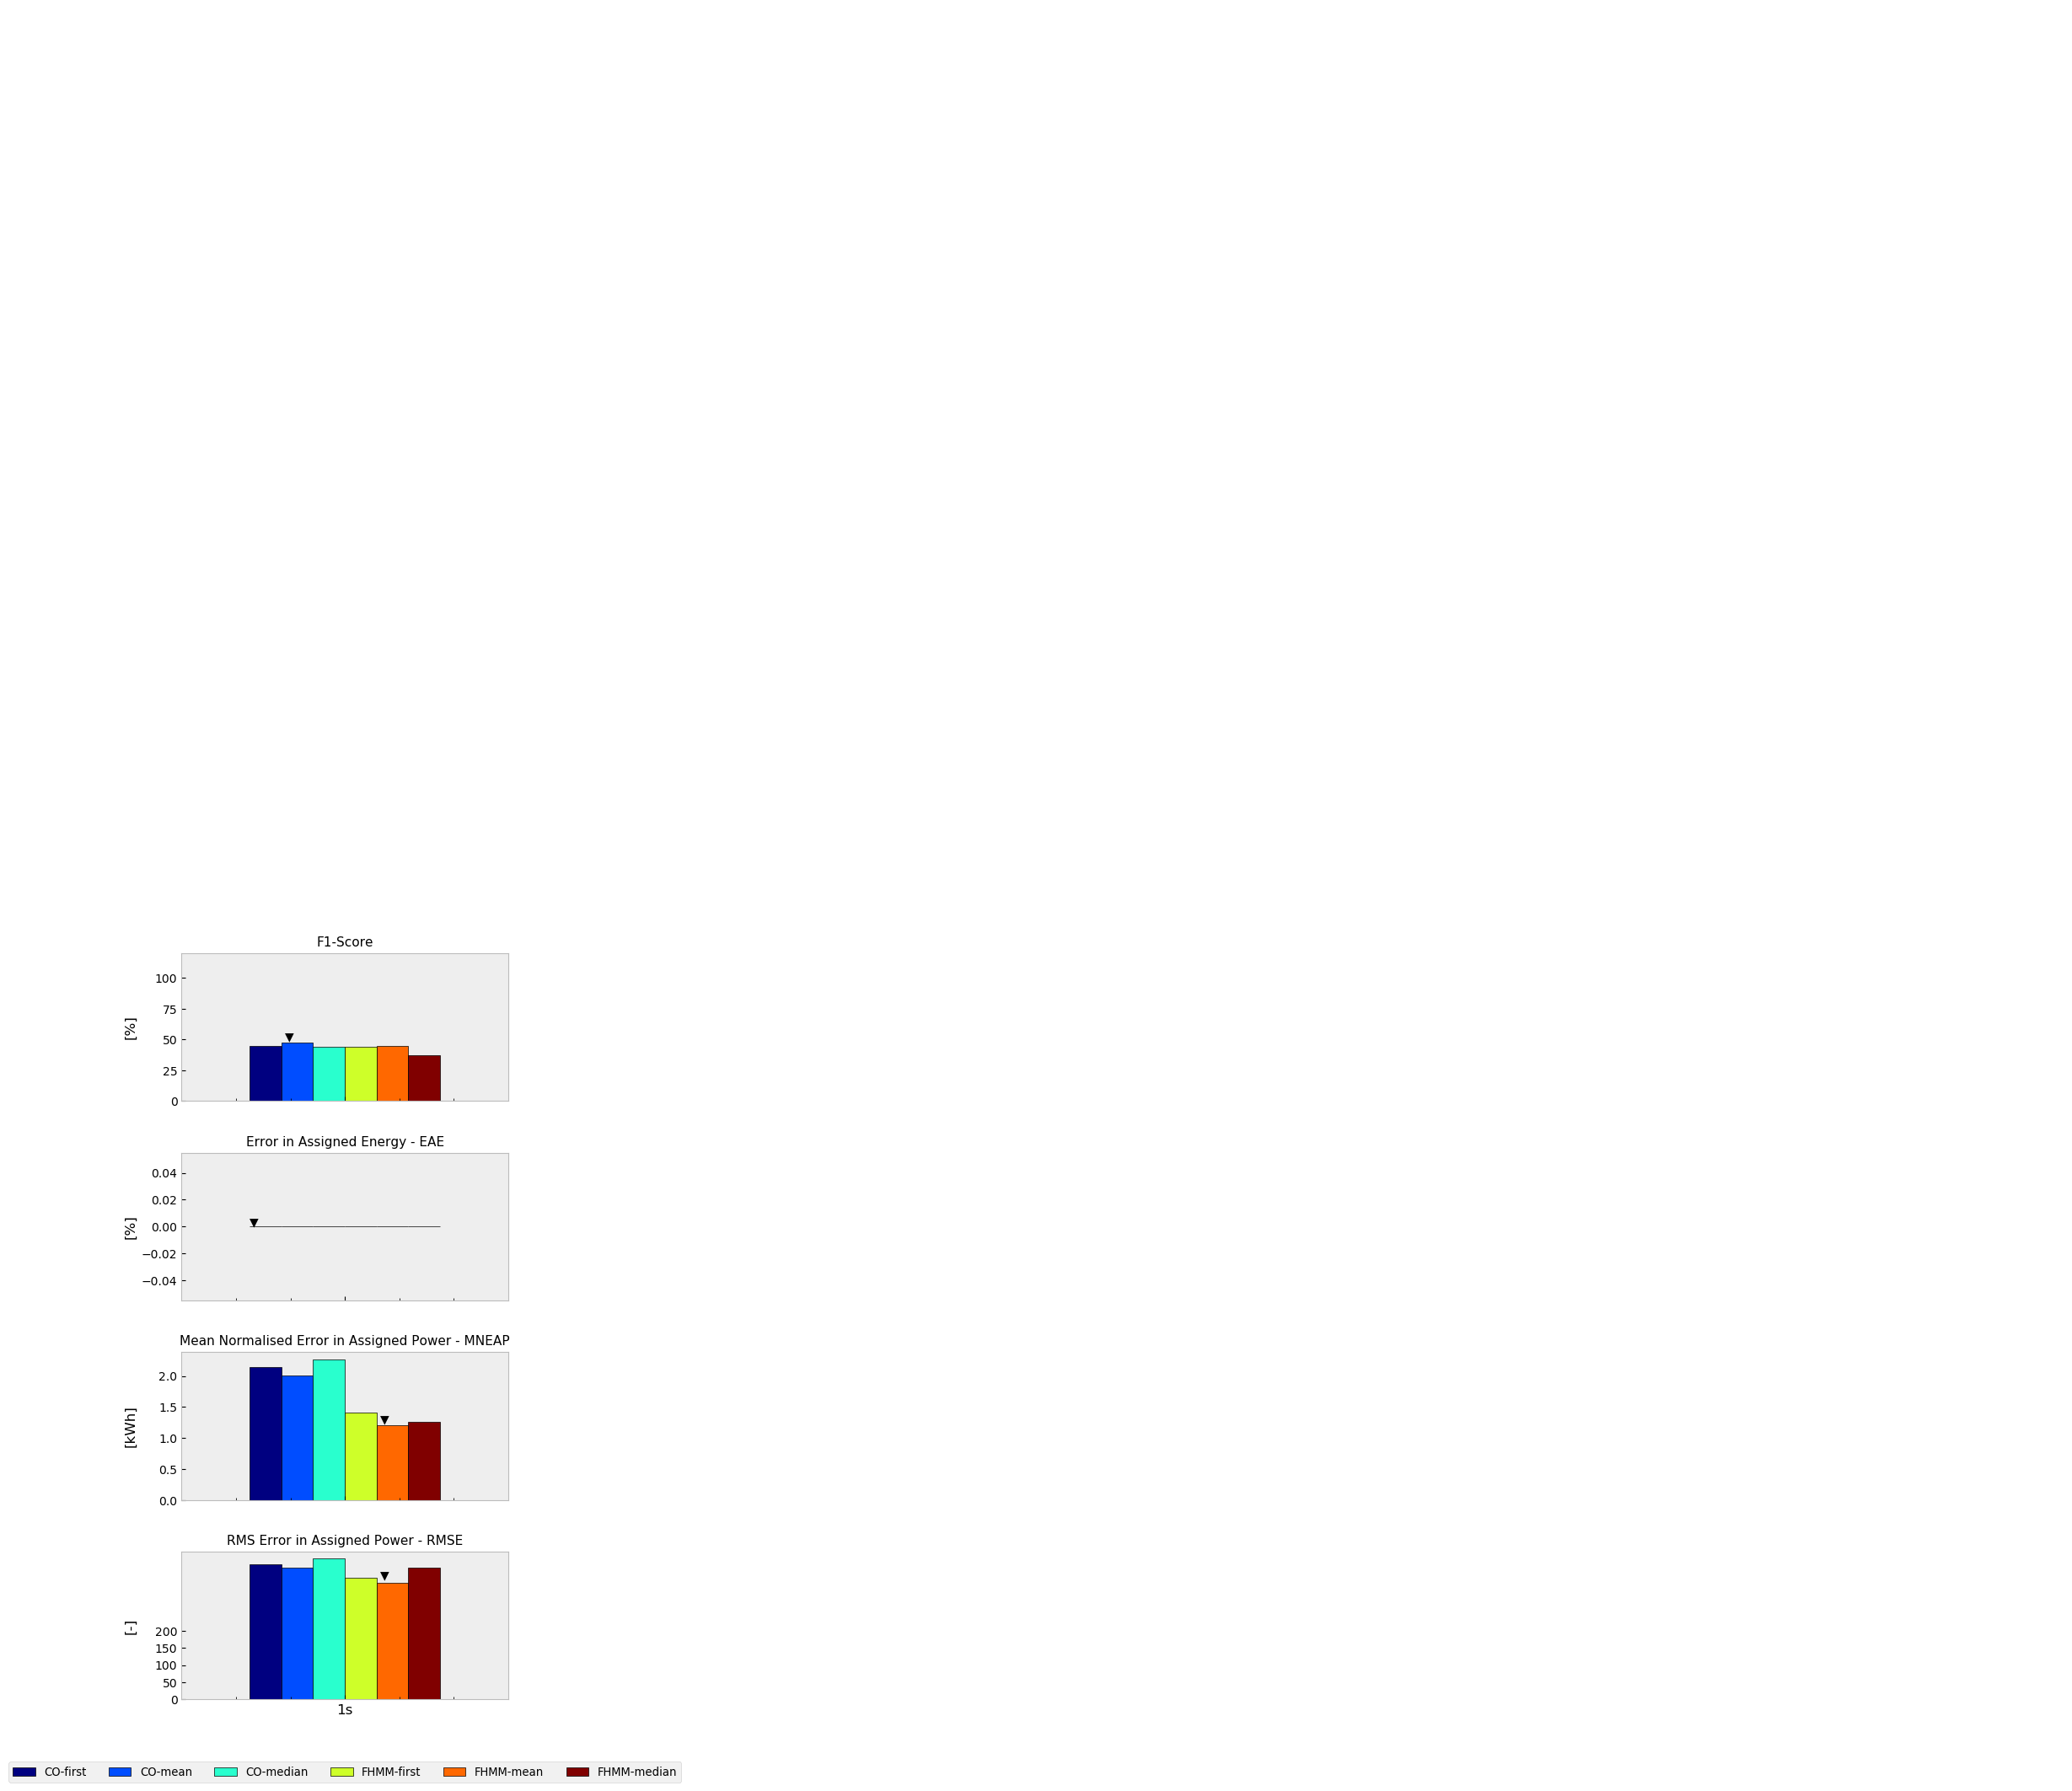

In [43]:
rcParams['figure.figsize'] = (5, 11.5)
fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=True, gridspec_kw={'hspace': 0.35})
cols=['F1','EAE','MNEAP','RMSE']
ylabels=['[%]','[%]','[kWh]','[-]','[W]']
per=['1s']

labels={'CO-first':-0.35, 'CO-mean':-0.22, 'CO-median':-0.11, 'FHMM-first':0.01, 'FHMM-mean':0.13 ,'FHMM-median':0.245}

c=0
for ax in fig.get_axes():      
    m_mean[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, cmap="jet")
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    x = 0
    for p in per:
        ax.annotate("▼", xy=(labels[maxs_i[p][cols[c]]]+x, maxs[p][cols[c]]+maxs[p][cols[c]]*0.03))
        x+=1
    c+=1
    
ax5.set_xticklabels(labels=per, rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax2,ax3,ax4,ax5)])
ax2.set(ylim=(0,120))
ax2.set_yticks([0,25,50,75,100])
ax5.set_yticks([0,50,100,150,200])

ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels.keys(), loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.6),fontsize=9.5)

ax3.annotate("kWh", xy=(6.22, 0.9)); #30min FHMM-median
ax5.annotate("   W", xy=(6.22, 90)); #30min FHMM-median


plt.savefig('./data/images/5.7_All_metrics.svg', bbox_inches='tight', transparent=True)

pass

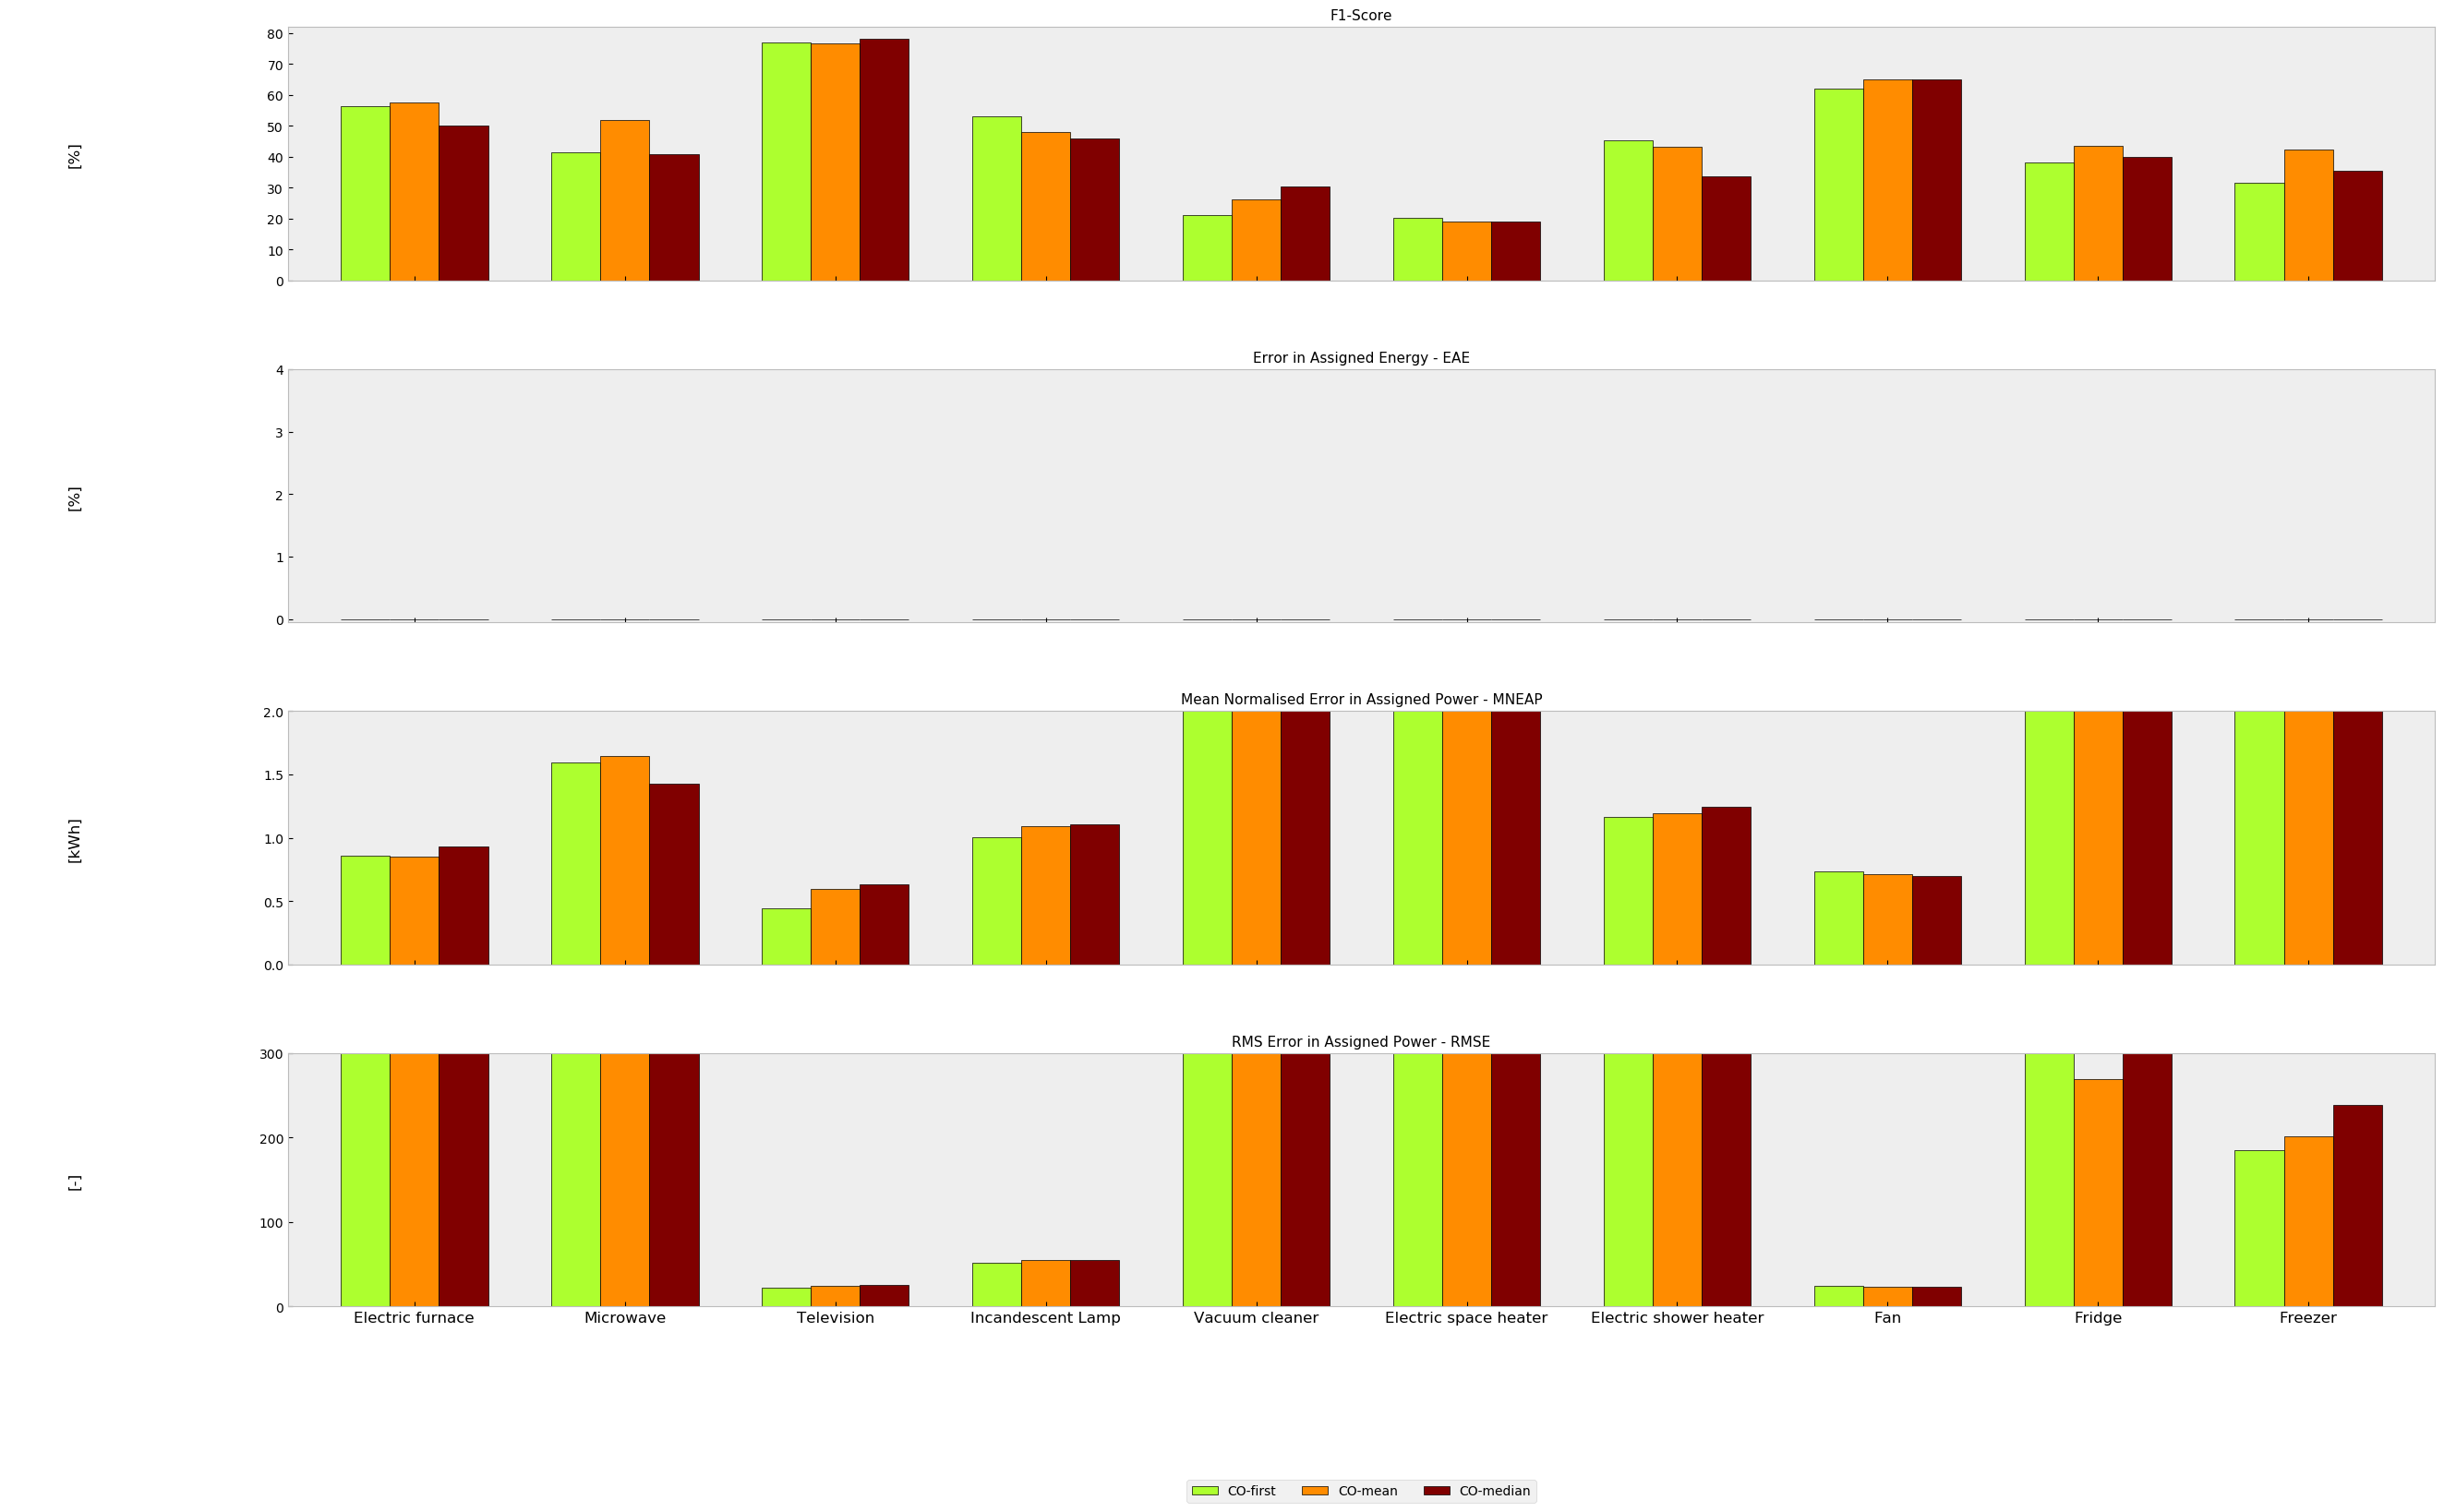

In [44]:
rcParams['figure.figsize'] = (30, 18)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})

#cols=['FEAC','F1','EAE','MNEAP','RMSE']
cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']
labels=['CO-first', 'CO-mean' ,'CO-median']
c=0

# 0=co first, 2=CO MEAN  Y 4= CO MEDIAN
# 1=FHMM FIRST, 2 FHMM MEAN Y 4 FHMM MEDIAN


#TOMAMOS CO1SEG POR NO DISPONER DE DATOS PARA FHMM DE 1SEGUNDO
for ax in fig.get_axes():
    
    df=pd.DataFrame([m['1s'][0][cols[c]],m['1s'][2][cols[c]],m['1s'][4][cols[c]]]).transpose()
    #if ax==ax1:
    #    df['FEAC'].mean().plot.barh(ax=ax1, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    #else:
    #     df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
 
    df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1   
    

ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax1,ax2,ax3,ax4,ax5)])
ax3.set_yticks([0,1,2,3,4])
ax4.set(ylim=(0,1.8))
ax4.set_yticks([0,0.5,1,1.5,2])
ax5.set(ylim=(0,270))
ax5.set_yticks([0,100,200,300])
ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.8))


plt.savefig('./data/images/5.8_All_metrics_2.svg', bbox_inches='tight', transparent=True)

pass

In [45]:
print('CO-first')
print(m['1s'][0])
print('\nCO-mean')
print(m['1s'][2])
print('\nCO-median')
print(m['1s'][4])

CO-first
                               F1  EAE     MNEAP        RMSE
Electric furnace        56.497175  0.0  0.862448  908.191477
Microwave               41.369986  0.0  1.591679  556.532704
Television              77.027734  0.0  0.441914   22.507392
Incandescent Lamp       53.125000  0.0  1.008114   51.721719
Vacuum cleaner          21.039290  0.0  2.096596  299.513351
Electric space heater   20.306966  0.0  2.476358  878.934936
Electric shower heater  45.274477  0.0  1.163860  658.893973
Fan                     62.123718  0.0  0.737101   24.147592
Fridge                  38.254046  0.0  6.820029  342.423462
Freezer                 31.599229  0.0  4.283403  185.005981

CO-mean
                               F1  EAE     MNEAP        RMSE
Electric furnace        57.615894  0.0  0.848915  880.819840
Microwave               51.820491  0.0  1.644755  570.958697
Television              76.707349  0.0  0.595005   24.598068
Incandescent Lamp       47.915087  0.0  1.094777   54.837702
Vacuum

### Results of the Best Model
Based on the obtained results, the FHMM model trained with device data averaged every 30 seconds is proposed as the best choice. This model is only considered suitable for disaggregating average active power data measured at the main meter every 30 seconds.


 ## INDEX OF THE DATAFRAME

CO_60s_first:0

FHMM_60s_first:1

CO_60s_mean:2

FHMM_60s_mean :3

CO_60s_median:4

FHMM_60s_median:5


------------------------------


CO_5min_first:6

FHMM_5min_first:7

CO_5min_mean:8

FHMM_5min_mean:9

CO_5min_median:10

 FHMM_5min_median:11


----------------------------


CO_10min_first:12

FHMM_10min_first:13

CO_10min_mean:14

FHMM_10min_mean :15

CO_10min_median:16

FHMM_10min_median:17

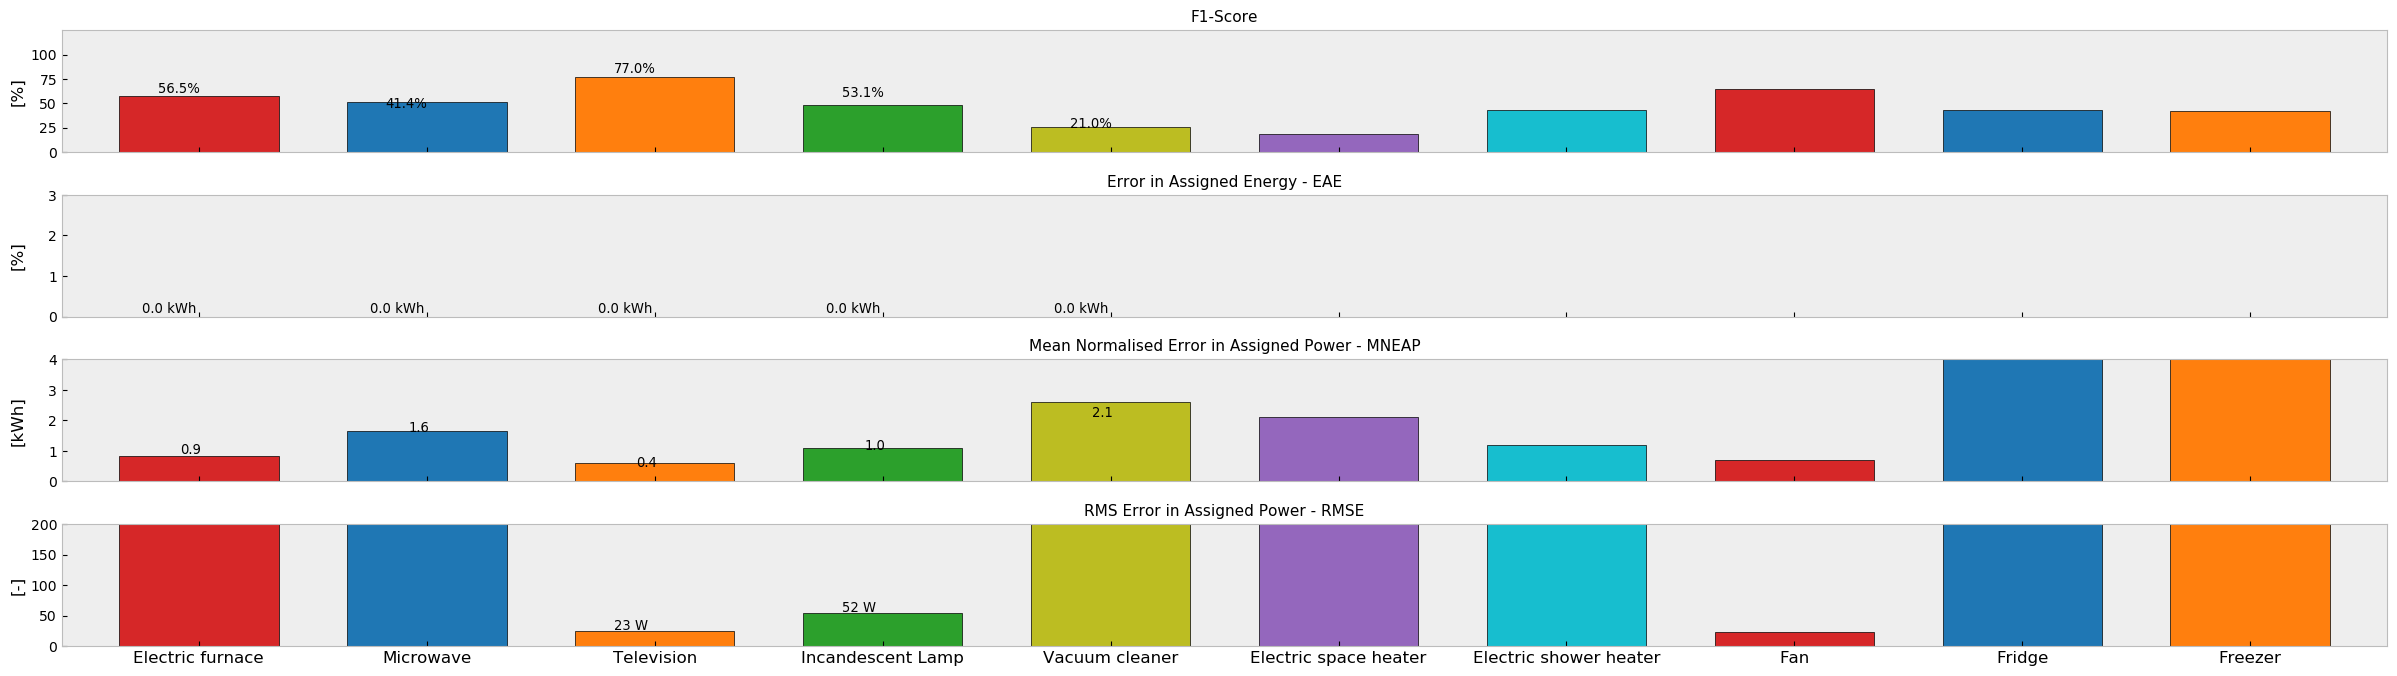

In [46]:
rcParams['figure.figsize'] = (30, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})
#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']
ylabels=['[%]','[%]','[kWh]','[-]','[W]']
colors=['tab:red','tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']
c=0


#ponemos como indice el 2 al ser CO MEAN
for ax in fig.get_axes():
    df=pd.DataFrame(m['1s'][2][cols[c]])
    df[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, color=colors)
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1


ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})

fig.align_ylabels([(ax2,ax3,ax4,ax5)])

ax2.set(ylim=(0,125))
ax3.set(ylim=(0,1))
ax4.set(ylim=(0,0.7))
ax5.set(ylim=(0,110))

ax2.set_yticks([0,25,50,75,100])
ax3.set_yticks([0,1,2,3])
ax4.set_yticks([0,1,2,3,4])
ax5.set_yticks([0,50,100,150,200])


ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')

df=pd.DataFrame(m['1s'][0])

for x in range(5):ax2.annotate(str(round(df['F1'][x],1))+'%', xy=(x-0.18 , df['F1'][x]+4),fontsize=9.5)
for x in range(5):ax3.annotate(str(round(df['EAE'][x],1))+' kWh', xy=(x-0.25 , df['EAE'][x]+0.1),fontsize=9.5)
for x in range(5):ax4.annotate(str(round(df['MNEAP'][x],1)), xy=(x-0.08 , df['MNEAP'][x]+0.03),fontsize=9.5)
for x in range(5):ax5.annotate(str(round(df['RMSE'][x]))+' W', xy=(x-0.18 , df['RMSE'][x]+5),fontsize=9.5)

plt.savefig('./data/images/5.9_Metrics_CO_1s_median.svg', bbox_inches='tight', transparent=True)

In [47]:
valid_Devices.total_energy()

Calculating total_energy for ElecMeterID(instance=11, building=1, dataset='DSUAL') ...   

active    1.055156
dtype: float64

In [48]:
valid_Devices.energy_per_meter()

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)","(7, 1, DSUAL)","(8, 1, DSUAL)","(9, 1, DSUAL)","(10, 1, DSUAL)","(11, 1, DSUAL)"
active,0.408431,0.126377,0.023044,0.027059,0.056805,0.119409,0.24289,0.016321,0.018187,0.016634
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replicating Model Training

In [ ]:
from nilmtk import DataSet
from nilmtk.legacy.disaggregate import FHMM


train = DataSet('dsualmh_test.h5')



train.set_window(start="2023-06-06 11:19:19", end="2023-06-06 11:40:28")

train_elec=train.buildings[1].elec 

#dispositivos a entrenar: 
train_Devices=train_elec.select(instance=[2,3,4,5,6,7,8,9,10,11])



#entrenamiento y exportación del modelo
CO_1s_median=FHMM()
CO_1s_median.MIN_CHUNK_LENGTH=1
CO_1s_median.train(train_Devices,
                        num_states_dict={}, #en otro caso: { }
                        ac_type='active',
                        sample_period=1,
                        resample_kwargs={'how':'median'})



print('\n\nDone!')


Training model for submeter 'ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='incandescent lamp', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=8, building=1

In [ ]:
#from nilmtk.legacy.disaggregate import FHMM
from nilmtk.legacy.disaggregate import CombinatorialOptimisation
FHMM=FHMM()
#FHMM.import_model('C:/data/FHMM_30s_median_model.pickle') 
print('Oven: '+str(CO_1s_median.individual[valid_Devices[2]].means_))
print('Microwave: '+str(CO_1s_median.individual[valid_Devices[3]].means_))
print('Television: '+str(CO_1s_median.individual[valid_Devices[4]].means_))
print('Kettle: '+str(CO_1s_median.individual[valid_Devices[5]].means_))
print('Vacuum Cleaner: '+str(CO_1s_median.individual[valid_Devices[6]].means_))

print('electric space heater: '+str(CO_1s_median.individual[valid_Devices[7]].means_))
print('electric shower heater: '+str(CO_1s_median.individual[valid_Devices[8]].means_))
print('Fan: '+str(CO_1s_median.individual[valid_Devices[9]].means_))
print('Fridge: '+str(CO_1s_median.individual[valid_Devices[10]].means_))
print('Freezer: '+str(CO_1s_median.individual[valid_Devices[11]].means_))


In [ ]:
CO_1s_median.model

In [ ]:
CO_1s_median.individual